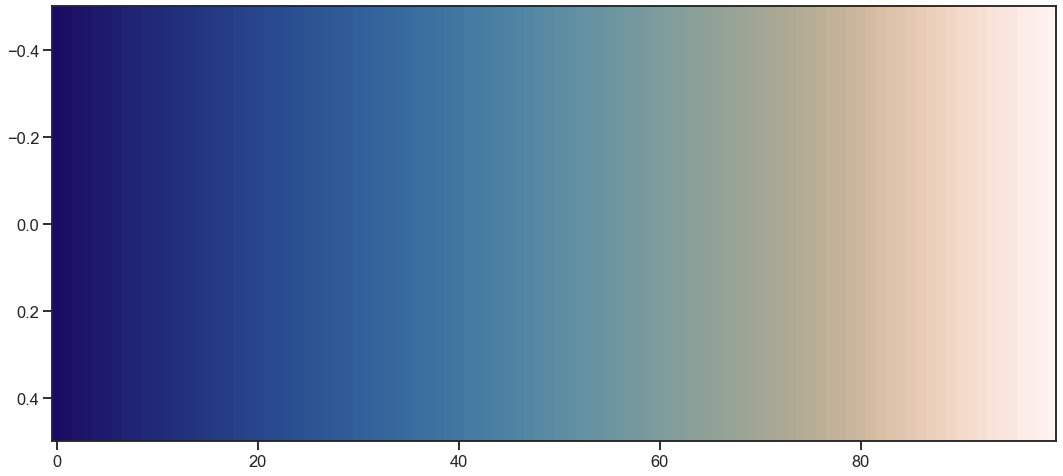

(0.147494, 0.228107, 0.516608, 1.0)

In [403]:
f, ax = plt.subplots(figsize=(18, 8))
x = np.linspace(0, 100, 100)[None, :]
ax.imshow(x, aspect='auto', cmap=cm.lapaz) # or any other colourmap
plt.show()
cm.lapaz(40)

# Conjunto de imagenes para articulo

Perez, A. & Dominguez, C. (2022). Outer tropical cyclone size database for precipitation in the North Atlantic and Northeast Pacific. Earth System Science Data

In [1]:
# Importar librerias
import pandas as pd
import netCDF4 as nc
import numpy as np
import cv2
import os
import errno
import geopandas as gpd
import seaborn as sns
import shapely
from shapely.geometry import shape, Polygon, Point, MultiPoint, box, LineString

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
import cartopy
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
def each6h(dfNA):
    df = dfNA.loc[(dfNA.hh == 0)|(dfNA.hh == 12)|(dfNA.hh == 18)|(dfNA.hh == 6)].reset_index(drop=True)
    return df

In [3]:
names = ['dd','mm','yy','hh','lat', 'lon', 'MWS', 'CPSL', 'RNE', 'RNO', 'RSO', 'RSE','Rp','A','D','S','CT']
dfNA = each6h(pd.read_table('800/NA880.dat', names=names, index_col=False))
dfEP = each6h(pd.read_table('800/EP880.dat', names=names, index_col=False))

In [124]:
df = pd.read_table('800/NA880.dat', names=names, index_col=False)

In [126]:
dfalex = df.loc[(df.CT== 'AL012010')]

In [128]:
dfalex.reset_index()

,index,dd,mm,yy,hh,lat,lon,MWS,CPSL,RNE,RNO,RSO,RSE,Rp,A,D,S,CT
0,138,24,6,2010,18,15.9,-82.0,46.25,1007,978.27,791.58,508.88,724.38,750.78,0.48,0.61,0.11,AL012010
1,139,25,6,2010,0,16.0,-82.1,46.25,1006,1316.46,1092.28,588.83,1310.14,1076.93,0.55,0.58,0.16,AL012010
2,140,25,6,2010,6,16.1,-82.3,46.25,1006,868.87,715.89,753.56,683.17,755.37,0.21,0.46,0.20,AL012010
3,141,25,6,2010,12,16.2,-82.5,55.50,1005,768.73,751.12,860.14,674.16,763.54,0.22,0.55,0.25,AL012010
4,142,25,6,2010,18,16.4,-83.1,55.50,1005,1173.25,777.37,694.63,1185.44,957.67,0.41,0.44,0.22,AL012010
5,143,26,6,2010,0,16.6,-83.9,55.50,1004,1171.20,901.28,778.82,1153.22,1001.13,0.34,0.35,0.30,AL012010
6,144,26,6,2010,6,16.7,-84.9,74.00,1004,759.89,868.73,858.20,746.44,808.32,0.14,0.34,0.39,AL012010
7,145,26,6,2010,12,16.9,-86.1,74.00,1004,744.77,804.75,1051.47,835.41,859.10,0.29,0.23,0.34,AL012010
8,146,26,6,2010,18,17.2,-87.2,101.70,996,881.30,815.78,989.09,938.33,906.12,0.18,0.42,0.38,AL012010
9,147,27,6,2010,0,17.5,-88.2,101.70,995,1033.01,659.87,1031.05,947.69,917.90,0.36,0.31,0.40,AL012010


### FIGURA 1. 
Extensión del campo de nubes a través de contornos generados con imágenes IR (contornos grises) del huracán Alex en el 2010, cuyas posiciones están representadas por puntos azules. Las líneas rojas representan la división de cuadrantes considerada para la determinación de los radios del CT.

In [4]:
from cmcrameri import cm
from cartopy.io.shapereader import Reader as sf
from cartopy.feature import ShapelyFeature as cfeature
import cartopy.io.img_tiles as cimgt

In [5]:
def circulo(c,r):
    """Función para construir un circulo. Los argumentos para la función son:
    C = centro de la circunferencia
    r = medida de la circunferencia 
    Ambas medidas deben estar en posición en grados"""
    ang = np.arange(0,np.pi*2,0.01)
    x = r*np.cos(ang)+c[0]
    y = r*np.sin(ang)+c[1]
    return (x,y)
def gdf_conver(gdf):
    """ Función para convertir una serie de datos al crs EPSG:4326, que
    representa una proyección geografica WGS84"""
    return gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[gdf])

In [6]:
poly = pd.read_csv('pol_alex.csv')
geometry = gpd.GeoSeries.from_wkt(poly['geometry'] )
poly = gpd.GeoDataFrame(data = poly, geometry = geometry, crs = 4326)
alex = dfNA.loc[(dfNA.CT== 'AL012010')]

In [7]:
i = 26
R34 = 232.5
R34_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],R34/111.1)
polyr34 =  gdf_conver(LineString(list(zip(R34_plot[0],R34_plot[1]))))

In [8]:
i = 26

ctp = [alex.iloc[i].lon,alex.iloc[i].lat]

ctpos = gdf_conver(Point([alex.iloc[i].lon,alex.iloc[i].lat]))
ctpos['Name'] = 'Centro del CT'
R_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],alex.iloc[i].Rp/109)
polyar =  gdf_conver(LineString(list(zip(R_plot[0],R_plot[1]))))



#plt.savefig("images/Fig_2_3.jpeg", dpi= 300, bbox_inches='tight')

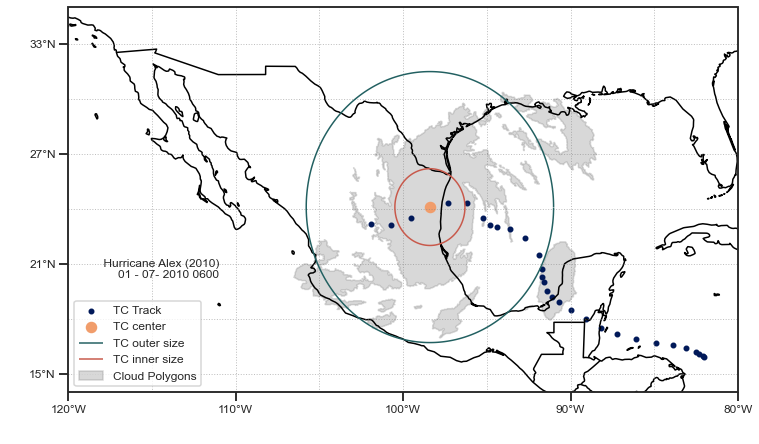

In [367]:
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection":ccrs.PlateCarree()})

# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-120, -80, 14, 35], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-120,-79,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(15,35,6), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
poly[poly['ID']==i].plot(
                         ax=ax, alpha = 0.3, color = 'gray', legend=True,
                         edgecolor= 'gray'
                        )
alex.plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax, 
          color = cm.batlowS(0), xlabel =' ', ylabel= ' ', label = 'TC Track'
          )
ctpos.plot(
            ax=ax, color = cm.batlowS(4), markersize = 100, legend=True, label = 'TC center'
           )
polyar.plot(
            ax=ax, color = cm.batlowS(3),label = 'RPB', legend=True, 
            linewidth = 1.5
            )
polyr34.plot(
             ax=ax, color = cm.lajollaS(66),label = 'R34', legend=True, 
            linewidth = 1.5
            )

text = ' Hurricane Alex (2010)\n01 - 07- 2010 0600'
ax.text(-111, 20.7, text, fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(color='grey', alpha = 0.3, label='Poligonos segmentados')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

plt.savefig("Fig_1.jpeg", dpi= 300, bbox_inches='tight')

### FIGURA 2. 
 Ejemplo de tamaños calculados para el Huracán Patricia por cuadrante resultado de la técnica: a) ROCLOUD y b) RPB. 

In [12]:
def eti_fecha(hh,dd,mm,yy):
    return str(hh).zfill(2)+':00 UTC \n'+str(dd).zfill(2)+'−'+ str(mm).zfill(2)+'−' +str(yy)
def arco(r1,r2,r3,r4,c):
    ang = [np.arange(0,np.pi/2,0.01), np.arange(np.pi/2,np.pi,0.01),
           np.arange(np.pi,(3/2)*np.pi,0.01),np.arange((3/2)*np.pi,2*np.pi,0.01)]
    grafx, grafy = [], []
    for i,r in enumerate([r1,r2,r3,r4]): 
        grafx.append(r*np.cos(ang[i])+c[0])
        grafy.append(r*np.sin(ang[i])+c[1])
    return (np.concatenate(grafx, axis = 0),np.concatenate(grafy, axis = 0))
def arc(lon,lat,r1,r2,r3,r4):
    ctpos = [lon,lat]
    r1 = r1/111.1
    r2 = r2/111.1
    r3 = r3/111.1
    r4 = r4/111.1
    arc = arco(r1,r2,r3,r4,ctpos)
    return Polygon(list(zip(arc[0],arc[1])))

In [11]:
alex = dfNA.loc[(dfNA.CT== 'AL012010')]
alex = alex.reset_index(drop = True)
polygons = gpd.GeoDataFrame()
polygons['geometry'] = alex[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)

#### Para la precipitación:

In [13]:
names = ['CT','dd','mm','yy','hh','lat', 'lon', 'MWS', 'RNE', 'RNO', 'RSO', 'RSE','Rp']
PCPNA = each6h(pd.read_table('NA_2.5mm.dat', names=names, index_col=False))
alexpcp = PCPNA.loc[(PCPNA.CT== 'AL012010')]
alexpcp = alexpcp.reset_index(drop = True)
polygonspcp = gpd.GeoDataFrame()
polygonspcp['geometry'] = alexpcp[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)


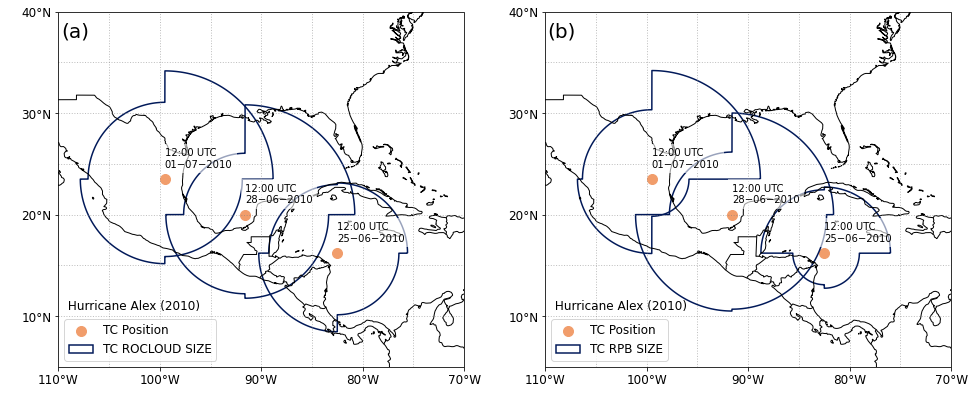

In [208]:
f, axs = plt.subplots(1,2,figsize=(16, 12), subplot_kw={"projection":ccrs.PlateCarree()})

position = [3,15,27]
#########################################################################################################################
ax =axs[0]
# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-110, -70, 5, 40], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-110,-69,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,41,10), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
alex.iloc[position].plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax,  s = 100,
          color = cm.batlowS(4), xlabel =' ', ylabel= ' ', label = 'TC Position'
          )
polygons.iloc[position].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

etiquetas = alex[['hh','dd','mm','yy']].apply(lambda x: eti_fecha(x[0],x[1],x[2],x[3]),axis=1)
for x, y, label in zip(alex.iloc[position].lon, alex.iloc[position].lat, etiquetas[position]):
    ax.annotate(label, xy=(x, y),xytext=(0, 12), textcoords="offset points", fontsize = 10,
                bbox=dict(facecolor='w', alpha = 0.6, edgecolor='None'))

ax.text(-96, 11, ' Hurricane Alex (2010)', fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

ax.text(-107, 38, '(a)', fontsize = 20, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(facecolor = 'w',linewidth = 1.5, edgecolor = cm.batlowS(0) , label = 'TC ROCLOUD SIZE')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

#######################################################################################################################
ax =axs[1]
# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-110, -70, 5, 40], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-110,-69,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,41,10), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
alexpcp.iloc[position].plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax,  s = 100,
          color = cm.batlowS(4), xlabel =' ', ylabel= ' ', label = 'TC Position'
          )
polygonspcp.iloc[position].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

etiquetas = alex[['hh','dd','mm','yy']].apply(lambda x: eti_fecha(x[0],x[1],x[2],x[3]),axis=1)
for x, y, label in zip(alex.iloc[position].lon, alex.iloc[position].lat, etiquetas[position]):
    ax.annotate(label, xy=(x, y),xytext=(0, 12), textcoords="offset points", fontsize = 10,
                bbox=dict(facecolor='w', alpha = 0.6, edgecolor='None'))

ax.text(-96, 11, ' Hurricane Alex (2010)', fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

ax.text(-107, 38, '(b)', fontsize = 20, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(facecolor = "w",linewidth = 1.5, edgecolor = cm.batlowS(0) ,label = 'TC RPB SIZE')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

#######################################################################################################################

plt.savefig("Fig_2.jpeg", dpi= 300, bbox_inches='tight')

## FIGURA 3 
Gráfico de cajas y bigotes de las distribuciones de los radios por cuadrante y el Rmean (km) de los radios en la región de estudio de la cuenca NA (rojo) y  EP (gris). Los valores promedios se encuentran representados por el punto blanco dentro de la caja durante el periodo 2000-2020.


In [17]:
from itertools import combinations
from statannotations.Annotator import Annotator

In [18]:
def df_cuenca(cuenca,R1,R2,R3,R4,R5):
    df = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    df4 = pd.DataFrame()
    RADIOS =pd.DataFrame()
    df['tamaño'] = R1
    df['radio'] = 'RNE'
    df['cuenca'] = cuenca

    df1['tamaño'] = R2
    df1['radio'] = 'RNO'
    df1['cuenca'] = cuenca

    df2['tamaño'] = R3
    df2['radio'] = 'RSO'
    df2['cuenca'] = cuenca

    df3['tamaño'] = R4
    df3['radio'] = 'RSE'
    df3['cuenca'] = cuenca

    df4['tamaño'] = R5
    df4['radio'] = 'Rp'
    df4['cuenca'] = cuenca

    RADIOS = pd.concat([RADIOS,df,df1,df2,df3,df4], axis=0)
    return RADIOS


In [19]:
RADIOS = pd.concat([df_cuenca('NA',dfNA.RNE,dfNA.RNO,dfNA.RSO,dfNA.RSE,dfNA.Rp), 
                    df_cuenca('EP',dfEP.RNE,dfEP.RNO,dfEP.RSO,dfEP.RSE,dfEP.Rp)],
                   axis= 0)


In [20]:
pairs = [
         [('RNE', 'NA'), ('RNE', 'EP')], 
         [('RNO', 'NA'), ('RNO', 'EP')],
         [('RSO', 'NA'), ('RSO', 'EP')], 
         [('RSE', 'NA'), ('RSE', 'EP')],    
         [('Rp', 'NA'),('Rp', 'EP')]
]

RNO_NA vs. RNO_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.128e-18 U_stat=1.719e+07
RNE_NA vs. RNE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.856e-95 U_stat=1.924e+07
RSO_NA vs. RSO_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.593e-01 U_stat=1.579e+07
RSE_NA vs. RSE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.939e-37 U_stat=1.786e+07
Rp_NA vs. Rp_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.692e-50 U_stat=1.825e+07


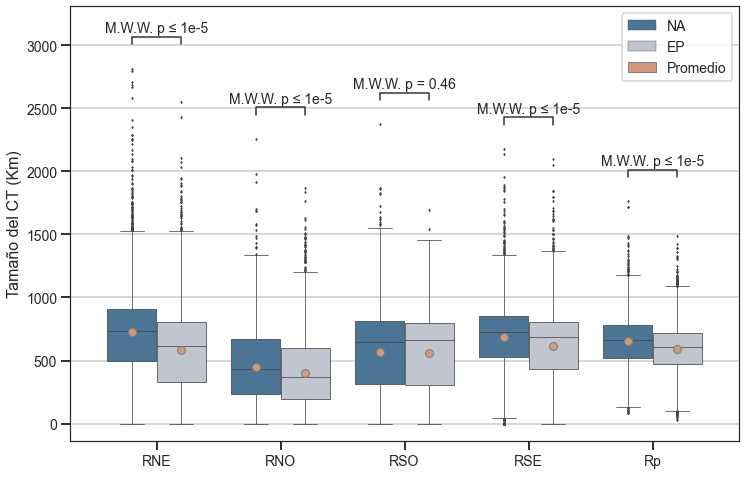

In [22]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
hue_plot_params = {
    'data': RADIOS,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]
}

f, ax = plt.subplots(figsize=(12, 8))
bp = sns.boxplot( ax = ax,
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"8"}
                )

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 14)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('Tamaño del CT (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_box_aspect(0.5)

plt.setp(f.axes, yticks=np.arange(0,3001, 500))

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Circle((1,1),radius = 0.25, facecolor = cm.budaS(100), 
                        linewidth = 1, edgecolor = "gray", label ='Promedio')

handles.append(patch) 

ax.legend(handles=handles, loc= "best", fontsize=14)


plt.savefig("Fig_3.jpeg", dpi= 300, bbox_inches='tight')

## Figura 4. 
Distribución espacial del tamaño de los CTs por cuadrante (km): (a) RNE, (b) RNO, (c) RSO, (d) RSE y (e) Rmean. Los límites en la barra de colores representan los rangos intercuantilícos (p25 y p75) durante el periodo 2000-2020.

In [462]:
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [445]:
dfbasin = pd.concat([dfNA,dfEP],axis=1)

In [446]:
dfbasin

,dd,mm,yy,hh,lat,lon,MWS,CPSL,RNE,RNO,...,CPSL,RNE,RNO,RSO,RSE,Rp,A,D,S,CT
0,7.0,6.0,2000.0,18.0,21.0,-93.0,46.25,1008.0,685.02,553.70,...,1008,626.05,542.21,679.67,713.31,640.31,0.24,0.51,0.31,CP032013
1,8.0,6.0,2000.0,0.0,20.9,-92.8,46.25,1009.0,721.32,618.31,...,1007,449.73,556.58,689.85,544.50,560.16,0.35,0.54,0.35,CP032013
2,8.0,6.0,2000.0,6.0,20.7,-93.1,46.25,1010.0,578.83,384.43,...,1007,610.48,564.24,700.40,602.67,619.45,0.19,0.35,0.20,CP032013
3,8.0,6.0,2000.0,12.0,20.8,-93.5,46.25,1010.0,664.24,410.25,...,1007,609.26,594.15,481.19,379.21,515.95,0.38,0.10,0.32,CP032013
4,5.0,6.0,2001.0,12.0,27.5,-95.0,74.00,1007.0,849.75,235.63,...,1008,594.40,681.42,574.40,624.08,618.58,0.16,0.49,0.19,CP032013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,0.00,0.00,0.00,918.05,918.05,1.00,0.79,0.06,EP252018
6919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1009,0.00,201.80,140.14,0.00,170.97,1.00,0.72,0.13,EP252018
6920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1009,107.64,89.57,68.72,50.11,79.01,0.53,0.26,0.47,EP252018
6921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1009,0.00,0.00,0.00,525.61,525.61,1.00,0.91,0.03,EP252018


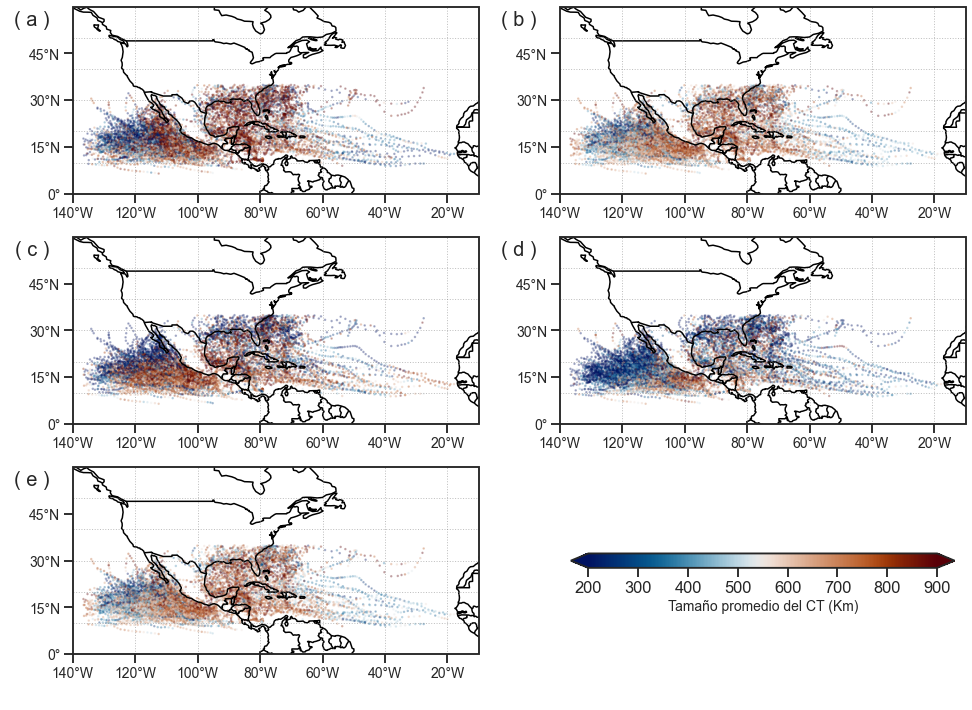

In [498]:
f, ax = plt.subplots(3, 2, figsize=(16, 12), subplot_kw={"projection":ccrs.PlateCarree()})

radi = ['RNE','RNO','RSO','RSE','Rp']

# ETIQUETA
for i,let in enumerate(['( a )','( c )','( e )']):
    ax[i,0].text(-0.1, 0.93, let, ha='center', va='center', 
                 transform=ax[i,0].transAxes, 
                 fontsize = 20, 
                 verticalalignment='center', horizontalalignment='right')
    ax[i,0].add_feature(cartopy.feature.COASTLINE)
    ax[i,0].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 60]
    ax[i,0].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,0].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,0].set_yticks(np.arange(0,60,15), crs=ccrs.PlateCarree())
    ax[i,0].tick_params(axis='both', labelsize=14)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,0].xaxis.set_major_formatter(lon_formatter)
    ax[i,0].yaxis.set_major_formatter(lat_formatter)
    dfbasin.plot(x='lon', y='lat', c = radi[(i*2)] , kind='scatter', alpha= 0.3,
             colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 200, s = 1,
            vmax = 900, legend = False, ax = ax[i,0], colorbar = False)

    
for i,let in enumerate(['( b )','( d )']):
    ax[i,1].text(-0.1, 0.93,let, ha='center', va='center', 
                 transform=ax[i,1].transAxes, 
                 fontsize = 20,
                 verticalalignment='center', horizontalalignment='right')
    ax[i,1].add_feature(cartopy.feature.COASTLINE)
    ax[i,1].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 60]
    ax[i,1].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,1].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,1].set_yticks(np.arange(0,60,15), crs=ccrs.PlateCarree())
    ax[i,1].tick_params(axis='both', labelsize=14)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,1].xaxis.set_major_formatter(lon_formatter)
    ax[i,1].yaxis.set_major_formatter(lat_formatter)
    dfbasin.plot(x='lon', y='lat', c = radi[(i*2)-1] , kind='scatter', alpha= 0.3,
         colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 200, s = 1,
        vmax = 900, legend = False, ax = ax[i,1], colorbar = False)


ax[2,1].axis('off')

norm = plt.Normalize(200, 900)
sm = plt.cm.ScalarMappable(cmap=cm.vik , norm=norm)
sm.set_array([])    
    
plt.setp(f.axes, ylabel = ' ', xlabel = ' ')

axins1 = inset_axes(ax[2,1],
                    width="200%",  # width = 5% of parent_bbox width
                    height="15%",  # height : 50%
                    loc='center',
                    bbox_to_anchor=(0.25, 0.25, 0.5, 0.5),
                    bbox_transform=ax[2,1].transAxes,
                    borderpad=0)

cbar1 = f.colorbar(sm,cax=axins1, extend='both', orientation='horizontal')
axins1.xaxis.set_ticks_position("bottom")
cbar1.set_alpha(0.6)
cbar1.set_label('Tamaño promedio del CT (Km)',fontsize = 14)

plt.savefig("Fig_4.jpeg", dpi= 300, bbox_inches='tight')

## Figura 5
Gráfica de cajas y bigotes de los radios por cuadrante y radio promedio (km) definido por el algoritmo RPB de los CTs del NA (en rojo) y EP (en gris). El promedio se encuentra representado por el punto blanco durante el periodo 2000-2020.

In [316]:
names = ['CT','dd','mm','yy','hh','lat', 'lon', 'MWS', 'RNE', 'RNO', 'RSO', 'RSE','Rp']
PCPNA = each6h(pd.read_table('NA_2.5mm.dat', names=names, index_col=False))
PCPEP = each6h(pd.read_table('EP2_5mm.dat', names=names, index_col=False))

In [317]:
RADIOS_PCP = pd.concat([df_cuenca('NA',PCPNA.RNE,PCPNA.RNO,PCPNA.RSO,PCPNA.RSE,PCPNA.Rp), 
                    df_cuenca('EP',PCPEP.RNE,PCPEP.RNO,PCPEP.RSO,PCPEP.RSE,PCPEP.Rp)],
                   axis= 0)


In [503]:
pairs = [
         [('RNE', 'NA'), ('RNE', 'EP')], 
         [('RNW', 'NA'), ('RNW', 'EP')],
         [('RSW', 'NA'), ('RSW', 'EP')], 
         [('RSE', 'NA'), ('RSE', 'EP')],    
         [('Rmean', 'NA'),('Rmean', 'EP')]
]

RNW_NA vs. RNW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.128e-18 U_stat=1.719e+07
RNE_NA vs. RNE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.856e-95 U_stat=1.924e+07
RSW_NA vs. RSW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.593e-01 U_stat=1.579e+07
RSE_NA vs. RSE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.939e-37 U_stat=1.786e+07
Rmean_NA vs. Rmean_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.692e-50 U_stat=1.825e+07


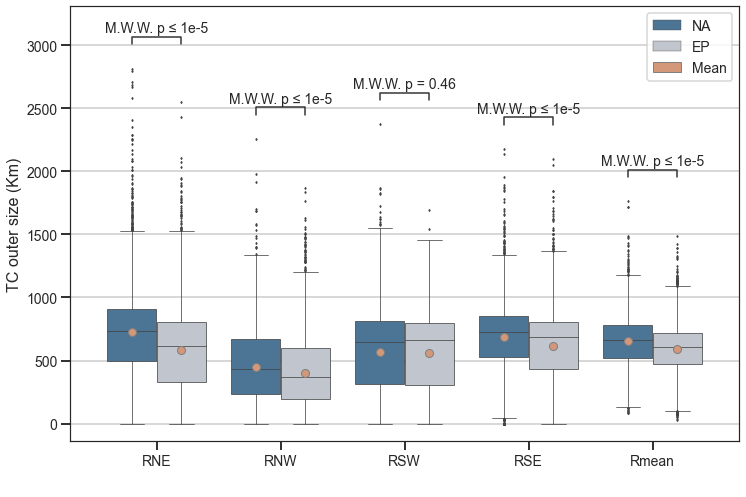

In [504]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
hue_plot_params = {
    'data': RADIOS,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]
}

f, ax = plt.subplots(figsize=(12, 8))
bp = sns.boxplot( ax = ax,
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"8"}
                )

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 14)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('TC outer size (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_box_aspect(0.5)

plt.setp(f.axes, yticks=np.arange(0,3001, 500))

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Circle((1,1),radius = 0.25, facecolor = cm.budaS(100), 
                        linewidth = 1, edgecolor = "gray", label ='Mean')

handles.append(patch) 

ax.legend(handles=handles, loc= "best", fontsize=14)


plt.savefig("Fig_5.jpeg", dpi= 300, bbox_inches='tight')

# NUEVAS FIGURAS PARA EL ARTICULO. MODIFICACIONES REALIZADAS

In [9]:
# NUEVA FIGURA 1
#POLY PARA R34
i = 26
R34 = 232.5
R34_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],R34/111.1)
polyr34 =  gdf_conver(LineString(list(zip(R34_plot[0],R34_plot[1]))))

In [10]:
ctp = [alex.iloc[i].lon,alex.iloc[i].lat]
ctpos = gdf_conver(Point([alex.iloc[i].lon,alex.iloc[i].lat]))
ctpos['Name'] = 'Centro del CT'
R_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],alex.iloc[i].Rp/111.1)
polyar =  gdf_conver(LineString(list(zip(R_plot[0],R_plot[1]))))

In [13]:
alex = dfNA.loc[(dfNA.CT== 'AL012010')]
alex = alex.reset_index(drop = True)
polygons = gpd.GeoDataFrame()
polygons['geometry'] = alex[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)

In [14]:
alexpcp.loc[26,'RNO'] = 1095.79

NameError: name 'alexpcp' is not defined

In [88]:
alexpcp.loc[26,'RNO']

595.79

In [15]:
names = ['CT','dd','mm','yy','hh','lat', 'lon', 'MWS', 'RNE', 'RNO', 'RSO', 'RSE','Rp']
PCPNA = each6h(pd.read_table('NA_2.5mm.dat', names=names, index_col=False))
alexpcp = PCPNA.loc[(PCPNA.CT== 'AL012010')]
alexpcp = alexpcp.reset_index(drop = True)
alexpcp.loc[26,'RNE'] = 1050
polygonspcp = gpd.GeoDataFrame()
polygonspcp['geometry'] = alexpcp[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)


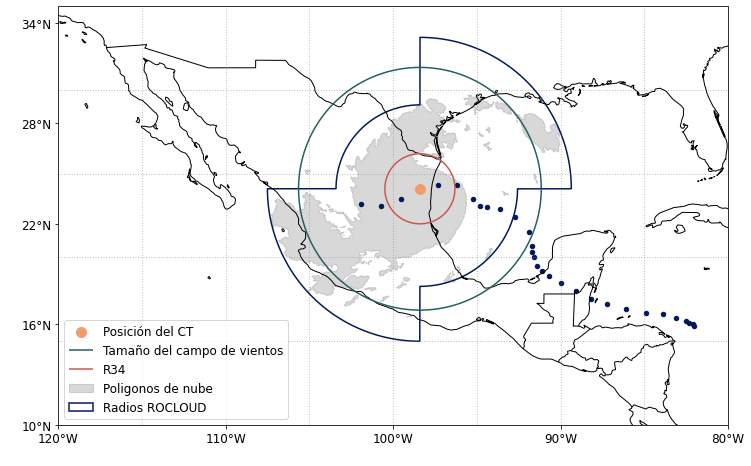

In [16]:
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection":ccrs.PlateCarree()})

# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-120, -80, 10, 35], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-120,-79,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,35,6), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
poly[poly['ID']==28].plot(
                         ax=ax, alpha = 0.3, color = 'gray', legend=True,
                         edgecolor= 'gray'
                        )
alex.plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax, 
          color = cm.batlowS(0), xlabel =' ', ylabel= ' ', label = 'Trayectoria del CT'
          , legend = False)
ctpos.plot(
            ax=ax, color = cm.batlowS(4), markersize = 100, legend=False, label = 'Posición del CT'
           )
polyar.plot(
            ax=ax, color = cm.batlowS(3),label = 'Tamaño del campo de vientos', legend=True, 
            linewidth = 1.5
            )
polyr34.plot(
             ax=ax, color = cm.lajollaS(66),label = 'R34', legend=True, 
            linewidth = 1.5
            )
polygons.loc[[i]].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(color='grey', alpha = 0.3, label='Poligonos de nube')
patch1 = mpatches.Patch(facecolor = "w",linewidth = 1.5, edgecolor = cm.batlowS(0) ,label = 'Radios ROCLOUD')
handles.append(patch)
handles.append(patch1) 

ax.legend(handles=handles, loc=3, fontsize=12)

plt.savefig("F1.jpeg", dpi= 300, bbox_inches='tight')

In [55]:
polypcp = pd.read_csv('alex_pcp.csv')
geometry = gpd.GeoSeries.from_wkt(polypcp['geometry'] )
polypcp = gpd.GeoDataFrame(data = polypcp, geometry = geometry, crs = 4326)


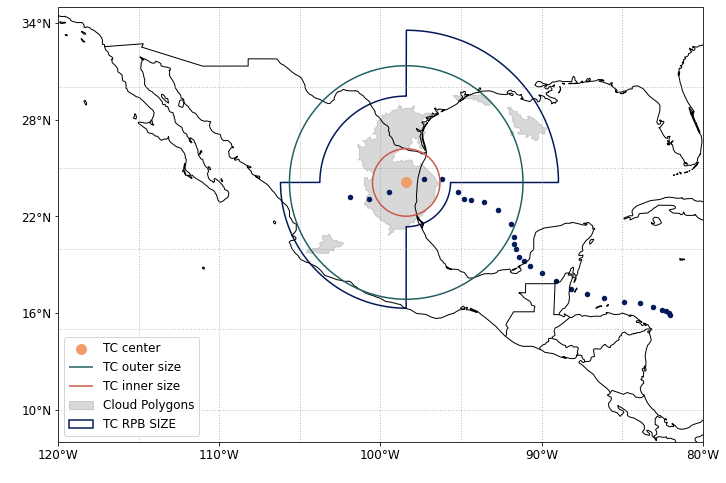

In [93]:
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection":ccrs.PlateCarree()})

# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-120, -80, 8, 35], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-120,-79,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,35,6), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
polypcp[polypcp['ID']==i].plot(
                         ax=ax, alpha = 0.3, color = 'gray', legend=True,
                         edgecolor= 'gray'
                        )
alex.plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax, 
          color = cm.batlowS(0), xlabel =' ', ylabel= ' ', label = 'TC Track'
          , legend = False)
ctpos.plot(
            ax=ax, color = cm.batlowS(4), markersize = 100, legend=False, label = 'TC center'
           )
polyar.plot(
            ax=ax, color = cm.batlowS(3),label = 'TC outer size', legend=True, 
            linewidth = 1.5
            )
polyr34.plot(
             ax=ax, color = cm.lajollaS(66),label = 'TC inner size', legend=True, 
            linewidth = 1.5
            )
#polygons.loc[[i]].plot(ax=ax, color = "None", edgecolor= cm.batlowS(3), linewidth = 1.5)
polygonspcp.loc[[i]].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(color='grey', alpha = 0.3, label='Cloud Polygons')
patch1 = mpatches.Patch(facecolor = "w",linewidth = 1.5, edgecolor = cm.batlowS(0) ,label = 'TC RPB SIZE')
handles.append(patch)
handles.append(patch1) 

ax.legend(handles=handles, loc=3, fontsize=12)
plt.savefig("F2.jpeg", dpi= 300, bbox_inches='tight')

# Figura 3 

In [371]:
PCPNA = PCPNA[~PCPNA.Rp.isna()]
PCPEP = PCPEP[~PCPEP.Rp.isna()]

In [372]:
RADIOS_NA = pd.concat([df_cuenca('RPB',PCPNA.RNE,PCPNA.RNO,PCPNA.RSO,PCPNA.RSE,PCPNA.Rp), 
                    df_cuenca('ROCLOUD',dfNA.RNE,dfNA.RNO,dfNA.RSO,dfNA.RSE,dfNA.Rp)],
                   axis= 0)

In [374]:
RADIOS_EP = pd.concat([df_cuenca('ROCLOUD',PCPEP.RNE,PCPEP.RNO,PCPEP.RSO,PCPEP.RSE,PCPEP.Rp), 
                    df_cuenca('RPB',dfEP.RNE,dfEP.RNO,dfEP.RSO,dfEP.RSE,dfEP.Rp)],
                   axis= 0)

In [375]:
pairs = [
         [('RNE', 'ROCLOUD'), ('RNE', 'RPB')], 
         [('RNW', 'ROCLOUD'), ('RNW', 'RPB')],
         [('RSW', 'ROCLOUD'), ('RSW', 'RPB')], 
         [('RSE', 'ROCLOUD'), ('RSE', 'RPB')],    
         [('Rmean', 'ROCLOUD'),('Rmean', 'RPB')]
]

RNW_ROCLOUD vs. RNW_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:4.086e-209 U_stat=1.445e+07
RNE_ROCLOUD vs. RNE_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.278e+07
RSW_ROCLOUD vs. RSW_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:1.103e-146 U_stat=1.552e+07
RSE_ROCLOUD vs. RSE_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:9.287e-178 U_stat=1.496e+07
Rmean_ROCLOUD vs. Rmean_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.248e+07


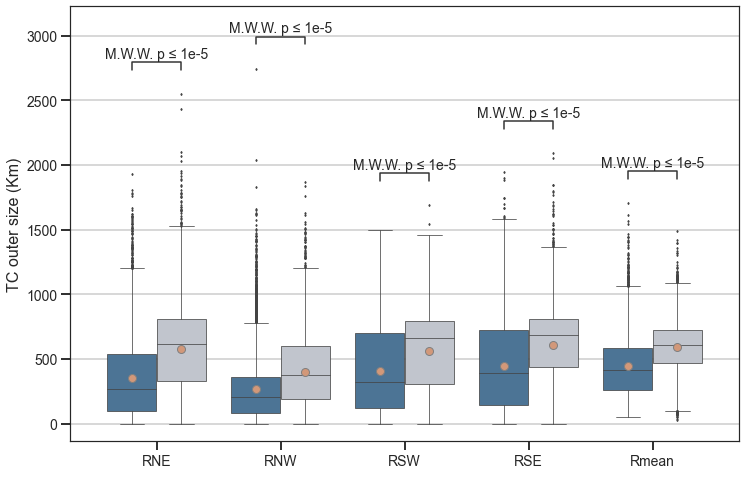

In [383]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
hue_plot_params = {
    'data': RADIOS_EP,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS_EP.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS_EP.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]
}

f, ax = plt.subplots(figsize=(12, 8))
bp = sns.boxplot( ax = ax, 
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"8"})

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 14)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('TC outer size (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_box_aspect(0.5)

#plt.setp(f.axes, yticks=np.arange(0,3001, 500))

plt.legend([],[], frameon=False)


RNW_ROCLOUD vs. RNW_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:4.086e-209 U_stat=1.445e+07
RNE_ROCLOUD vs. RNE_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.278e+07
RSW_ROCLOUD vs. RSW_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:1.103e-146 U_stat=1.552e+07
RSE_ROCLOUD vs. RSE_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:9.287e-178 U_stat=1.496e+07
Rmean_ROCLOUD vs. Rmean_RPB: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.248e+07
RNW_RPB vs. RNW_ROCLOUD: Mann-Whitney-Wilcoxon test two-sided, P_val:7.339e-99 U_stat=7.086e+06
RNE_RPB vs. RNE_ROCLOUD: Mann-Whitney-Wilcoxon test two-sided, P_val:8.978e-181 U_stat=6.186e+06
RSW_RPB vs. RSW_ROCLOUD: Mann-Whitney-Wilcoxon test two-sided, P_val:1.694e-158 U_stat=6.410e+06
RSE_RPB vs. RSE_ROCLOUD: Mann-Whitney-Wilcoxon test two-sided, P_val:1.277e-161 U_stat=6.372e+06
Rmean_RPB vs. Rmean_ROCLOUD: Mann-Whitney-Wilcoxon test two-sided, P_val:5.329e-182 U_stat=6.174e+06


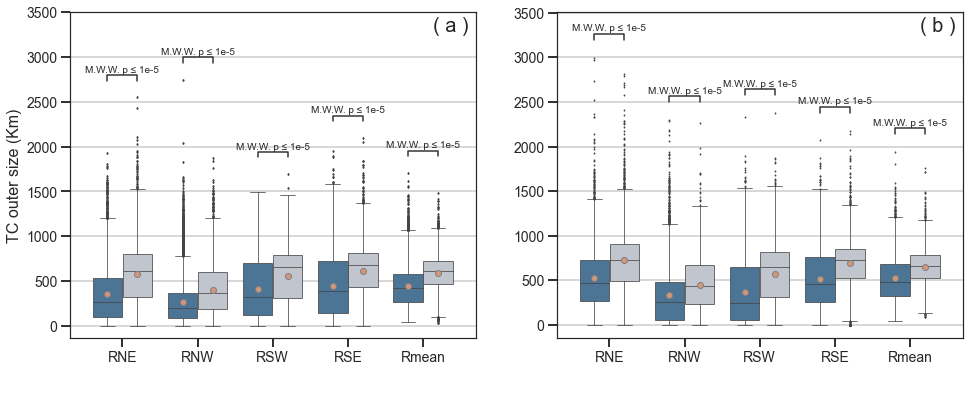

In [428]:
f, axs = plt.subplots(1,2,figsize=(16, 6))
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
#########################################################################################################################
hue_plot_params = {
    'data': RADIOS_EP,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS_EP.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS_EP.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]}
ax =axs[0]
bp = sns.boxplot( ax = ax, 
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"6"})

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 10)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('TC outer size (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)

plt.setp(f.axes, yticks=np.arange(0,3501, 500))
ax.get_legend().set_visible(False)
ax.text(4.6, 3350, '( a )', fontsize = 20, verticalalignment='center', horizontalalignment='right')
#########################################################################################################################
hue_plot_params = {
    'data': RADIOS_NA,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS_NA.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS_NA.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]}
ax =axs[1]
bp = sns.boxplot( ax = ax, 
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"6"})

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 10)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel(' ', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)

plt.setp(f.axes, yticks=np.arange(0,3501, 500))
ax.get_legend().set_visible(False)
ax.text(4.6, 3350, '( b )', fontsize = 20, verticalalignment='center', horizontalalignment='right')

plt.savefig("F3.jpeg", dpi= 300, bbox_inches='tight')

# FIGURA 4. 


In [443]:
BARO = pd.concat([dfNA,dfEP],axis=0).reset_index(drop=True)
BARP = pd.concat([PCPNA,PCPEP],axis=0).reset_index(drop=True)

DTRO = BARO.loc[(BARO.MWS<= 63)]
TTRO = BARO.loc[(BARO.MWS> 63) & (BARO.MWS<= 118)]
MIRO = BARO.loc[(BARO.MWS> 118) & (BARO.MWS<= 177)]
MARO = BARO.loc[(BARO.MWS> 177)]

DTRP = BARP.loc[(BARP.MWS<= 63)]
TTRP = BARP.loc[(BARP.MWS> 63) & (BARP.MWS<= 118)]
MIRP = BARP.loc[(BARP.MWS> 118) & (BARP.MWS<= 177)]
MARP = BARP.loc[(BARP.MWS> 177)]

In [444]:
BARO

,dd,mm,yy,hh,lat,lon,MWS,CPSL,RNE,RNO,RSO,RSE,Rp,A,D,S,CT
0,7,6,2000,18,21.0,-93.0,46.25,1008,685.02,553.70,892.42,868.72,749.96,0.38,0.41,0.13,AL012000
1,8,6,2000,0,20.9,-92.8,46.25,1009,721.32,618.31,956.51,726.56,755.68,0.35,0.60,0.16,AL012000
2,8,6,2000,6,20.7,-93.1,46.25,1010,578.83,384.43,752.94,919.22,658.86,0.58,0.68,0.12,AL012000
3,8,6,2000,12,20.8,-93.5,46.25,1010,664.24,410.25,714.98,877.39,666.72,0.53,0.46,0.09,AL012000
4,5,6,2001,12,27.5,-95.0,74.00,1007,849.75,235.63,360.69,667.28,528.34,0.72,0.43,0.32,AL012001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,7,11,2018,18,17.8,-112.2,46.25,1008,0.00,0.00,0.00,918.05,918.05,1.00,0.79,0.06,EP252018
11445,8,11,2018,6,17.6,-113.6,37.00,1009,0.00,201.80,140.14,0.00,170.97,1.00,0.72,0.13,EP252018
11446,8,11,2018,12,17.5,-114.4,37.00,1009,107.64,89.57,68.72,50.11,79.01,0.53,0.26,0.47,EP252018
11447,8,11,2018,18,17.4,-115.1,37.00,1009,0.00,0.00,0.00,525.61,525.61,1.00,0.91,0.03,EP252018


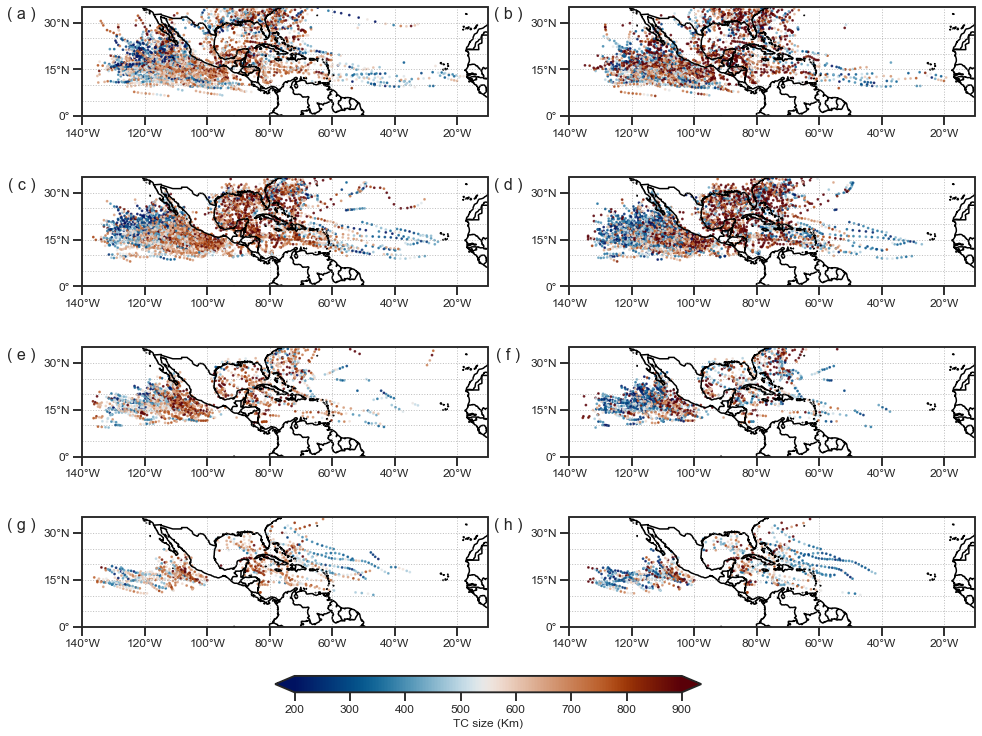

In [471]:
f, ax = plt.subplots(4, 2, figsize=(16, 12), subplot_kw={"projection":ccrs.PlateCarree()})

catna = [DTRO,TTRO,MIRO,MARO]
catep = [DTRP,TTRP,MIRP,MARP]

# ETIQUETA
for i,let in enumerate(['( a )','( c )','( e )', '( g )']):
    ax[i,0].text(-0.15, 0.93, let, ha='center', va='center', 
                 transform=ax[i,0].transAxes, 
                 fontsize = 16, 
                 verticalalignment='center', horizontalalignment='right')
    ax[i,0].add_feature(cartopy.feature.COASTLINE)
    ax[i,0].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 35]
    ax[i,0].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,0].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,0].set_yticks(np.arange(0,36,15), crs=ccrs.PlateCarree())
    ax[i,0].tick_params(axis='both', labelsize=12)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,0].xaxis.set_major_formatter(lon_formatter)
    ax[i,0].yaxis.set_major_formatter(lat_formatter)
    catna[i].plot(x='lon', y='lat', c = 'Rp' , kind='scatter', alpha= 0.8,
             colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 200, s = 1.5,
            vmax = 900, legend = False, ax = ax[i,0], colorbar = False)

    
for i,let in enumerate(['( b )','( d )','( f )','( h )']):
    ax[i,1].text(-0.15, 0.93,let, ha='center', va='center', 
                 transform=ax[i,1].transAxes, 
                 fontsize = 16,
                 verticalalignment='center', horizontalalignment='right')
    ax[i,1].add_feature(cartopy.feature.COASTLINE)
    ax[i,1].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 35]
    ax[i,1].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,1].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,1].set_yticks(np.arange(0,36,15), crs=ccrs.PlateCarree())
    ax[i,1].tick_params(axis='both', labelsize=12)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,1].xaxis.set_major_formatter(lon_formatter)
    ax[i,1].yaxis.set_major_formatter(lat_formatter)
    catep[i].plot(x='lon', y='lat', c = 'Rp' , kind='scatter', alpha= 0.8,
         colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 100, s = 1.5,
        vmax = 700, legend = False, ax = ax[i,1], colorbar = False)




norm = plt.Normalize(200, 900)
sm = plt.cm.ScalarMappable(cmap=cm.vik , norm=norm)
sm.set_array([])    
    
plt.setp(f.axes, ylabel = ' ', xlabel = ' ')

axins1 = inset_axes(ax[i,0],
                    width="70%",  # width = 5% of parent_bbox width
                    height="15%",  # height : 50%
                    loc='lower center',
                    bbox_to_anchor=(0.25, -0.6, 1.5, 1),
                    bbox_transform=ax[i,0].transAxes,
                    borderpad=0)

cbar1 = f.colorbar(sm,cax=axins1, extend='both', orientation='horizontal')
axins1.xaxis.set_ticks_position("bottom")
cbar1.set_alpha(0.6)
cbar1.set_label('TC size (Km)',fontsize = 12)
cbar1.ax.tick_params(labelsize=12)
plt.savefig("Fig4.jpeg", dpi= 300, bbox_inches='tight')

In [432]:
catna[1]

,dd,mm,yy,hh,lat,lon,MWS,CPSL,RNE,RNO,RSO,RSE,Rp,A,D,S,CT
4,5,6,2001,12,27.5,-95.0,74.00,1007,849.75,235.63,360.69,667.28,528.34,0.72,0.43,0.32,AL012001
5,5,6,2001,18,28.5,-95.3,92.50,1002,756.06,185.62,458.08,880.89,570.16,0.79,0.44,0.38,AL012001
6,6,6,2001,0,29.3,-95.3,83.25,1003,1005.16,867.39,1015.35,919.32,951.80,0.15,0.61,0.16,AL012001
27,11,6,2001,6,30.0,-90.5,64.75,1003,507.77,140.62,421.08,488.05,389.38,0.72,0.45,0.14,AL012001
28,11,6,2001,12,30.7,-89.4,74.00,1000,406.32,199.76,854.55,586.70,511.83,0.77,0.44,0.14,AL012001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,14,11,2020,18,12.5,-76.4,83.25,997,888.65,722.60,965.06,764.39,835.18,0.25,0.23,0.29,AL312020
4511,15,11,2020,0,12.6,-76.7,101.70,992,656.79,386.69,919.08,831.32,698.47,0.58,0.48,0.32,AL312020
4522,17,11,2020,18,13.7,-85.7,101.70,988,771.92,647.13,856.03,660.65,733.93,0.24,0.47,0.25,AL312020
4523,18,11,2020,0,13.8,-86.7,74.00,1000,685.21,672.66,526.00,728.69,653.14,0.28,0.57,0.21,AL312020
